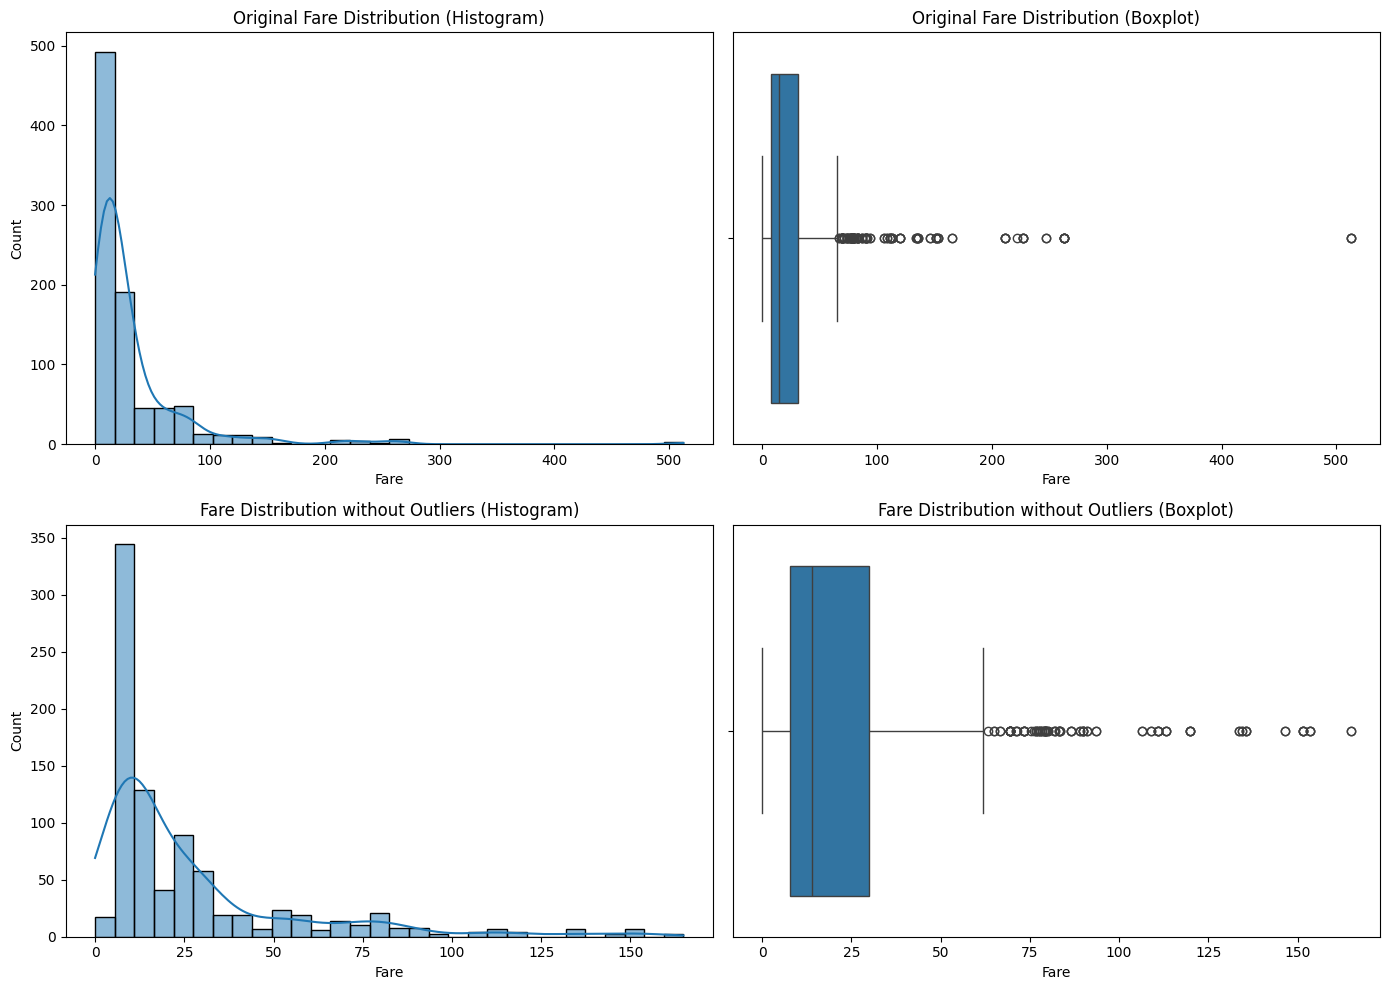

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Load Titanic dataset from seaborn
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
titanic = pd.read_csv(url)

# Check for any missing values in 'fare' and drop them
titanic = titanic.dropna(subset=['Fare'])

# Calculate Z-scores for the 'fare' column
z_scores = stats.zscore(titanic['Fare'])

# Identify outliers
threshold = 3
outliers = np.abs(z_scores) > threshold

# Remove outliers
titanic_no_outliers = titanic[~outliers]

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original dataset - Histogram
sns.histplot(titanic['Fare'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Fare Distribution (Histogram)')

# Original dataset - Boxplot
sns.boxplot(x=titanic['Fare'], ax=axes[0, 1])
axes[0, 1].set_title('Original Fare Distribution (Boxplot)')

# Cleaned dataset - Histogram
sns.histplot(titanic_no_outliers['Fare'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Fare Distribution without Outliers (Histogram)')

# Cleaned dataset - Boxplot
sns.boxplot(x=titanic_no_outliers['Fare'], ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution without Outliers (Boxplot)')

plt.tight_layout()
plt.show()
